In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/LogisticRegressionData.csv')
dataset.head()

,hour,pass
0,0.5,0
1,1.2,0
2,1.8,0
3,2.4,0
4,2.6,0


In [3]:
x = dataset.iloc[:, 0].values
x

array([ 0.5,  1.2,  1.8,  2.4,  2.6,  3.2,  3.9,  4.4,  4.5,  5. ,  5.3,
        5.8,  6. ,  6.1,  6.2,  6.9,  7.2,  8.4,  8.6, 10. ])

In [4]:
x.shape

(20,)

In [5]:
x = x.reshape(len(x), 1)
x.shape

(20, 1)

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.loc[:, 'pass'].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
X.shape

(20, 1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
X_train.shape, X_test ,X_test.shape

((16, 1),
 array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 (4, 1))

In [10]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
#6시간 공부했을때 합격일까? 0이면 불합격 1이면 합격 / 4시간 공부는?
logistic.predict([[6], [4]])

array([1, 0])

In [12]:
logistic.predict_proba([[6]]) #불합격 확률 vs 합격 확률


array([[0.141483, 0.858517]])

In [13]:
logistic.predict_proba([[4]]) #불합격 확률 vs 합격 확률

array([[0.62497682, 0.37502318]])

In [14]:
y_pred = logistic.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [15]:
X_test #공부시간

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [16]:
y_test #실제 결과

array([1, 0, 1, 0])

In [17]:
logistic.score(X_test, y_test) #정확도, 1에 가까울수록 좋음

0.75

In [18]:
def model_logistic():
    import pandas as pd
    dataset = pd.read_csv('data/LogisticRegressionData.csv')
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    from sklearn.linear_model import LogisticRegression 
    logistic = LogisticRegression()
    logistic.fit(X_train, y_train)
    return logistic

In [19]:
model = model_logistic() 
hour = 3.5
model.predict([[hour]]) #0은 불합격 1은 합격


array([0])

In [20]:
model.predict_proba([[hour]]) #불합격 확률 vs 합격 확률

array([[0.74822448, 0.25177552]])

In [21]:
def predict(hour):
    model = model_logistic()
    pred = model.predict([[hour]])
    pred_proba = model.predict_proba([[hour]])

    pass_proba = pred_proba[0][1]
    fail_proba = pred_proba[0][0]

    if pred[0] == 0:
        result = '불합격'
    else:
        result = '합격'

    print(f'{hour}시간 공부하면 {result}입니다.')
    print(f'합격:{pass_proba*100:.2f}% 불합격:{fail_proba*100:.2f}%')

predict(2.8)

2.8시간 공부하면 불합격입니다.
합격:13.02% 불합격:86.98%


In [22]:
import numpy as np
max = np.ceil(np.max(X_train))
min = np.floor(np.min(X_train))
max, min

(np.float64(9.0), np.float64(0.0))

In [23]:
import numpy as np
max = np.ceil(np.max(X_train))
min = np.floor(np.min(X_train))
x_range = np.arange(min, max, 0.1)
x_range

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9])

In [24]:
# p = 1/(1 + e^-y) y = mx + b
y = logistic.coef_ * x_range + logistic.intercept_
P = 1 / (1 + np.exp(-y))
P

array([[0.00583381, 0.00654462, 0.00734139, 0.00823436, 0.00923494,
        0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96

In [25]:
P.shape

(1, 90)

In [26]:
len(P)

1

In [27]:
P.shape[1]

90

In [28]:
cols = P.shape[1]
p = P.reshape(cols)
p

array([0.00583381, 0.00654462, 0.00734139, 0.00823436, 0.00923494,
       0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
       0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
       0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
       0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
       0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
       0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
       0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
       0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
       0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
       0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
       0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
       0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
       0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
       0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840

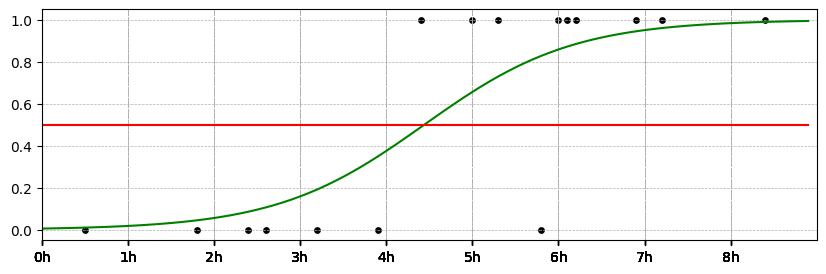

In [35]:
plt.figure(figsize=(10, 3))
plt.scatter(X_train, y_train, color= 'black', s=15) #s는 점 크기
plt.plot(x_range, p, color='green')
plt.plot(x_range, np.full(len(x_range), 0.5), color= 'red')
plt.grid(True, ls='--', lw=0.5)
xticks = [int(x) for x in x_range]
plt.xticks(xticks, [f'{x}h' for x in xticks])
plt.xlim(0,max)
plt.show()

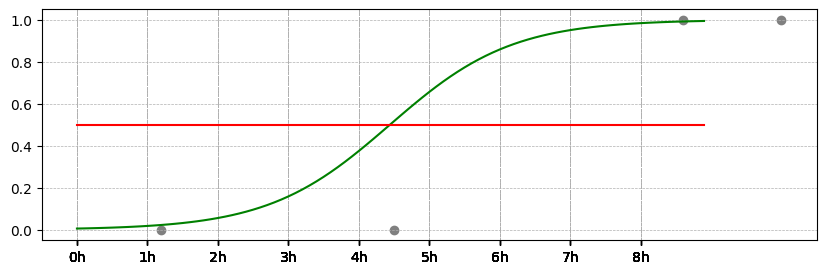

In [37]:
plt.figure(figsize=(10, 3))
plt.scatter(X_test, y_test, color= 'gray') 
plt.plot(x_range, p, color='green')
plt.plot(x_range, np.full(len(x_range), 0.5), color= 'red')
plt.grid(True, ls='--', lw=0.5)
xticks = [int(x) for x in x_range]
plt.xticks(xticks, [f'{x}h' for x in xticks])
plt.show()